# Linear Regression Analysis of final project

## 0. Packages and Loading data

In [1]:
# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
# I will look at only four classification algorithms: LogisticRegression, GaussianNB, SVM, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingRegressor


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [2]:
## Some useful functions

def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

In [3]:
## This is our original dataset

origin1=pd.read_csv('data2.csv',sep=',',index_col=0)

In [4]:
origin1.head()

,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",publicEdu,homicide,ecoFree,uniEnro,alcohol,unemploy,food,suicide,visitor,log_child,log_healthExp,log_income,log_ave_visitor
0,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,3.1,6.6,1.0,4.0,0.01,8.5,2100.0,5.7,0,4.600158,4.060443,6.238325,-2.302585
1,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,3.5,5.5,65.1,58.6,5.14,13.9,3023.0,5.9,3156000,2.740840,5.480639,8.353497,4.747385
2,5.604596,9.487703,0.447821,0.839397,64.001305,-0.198894,0.388313,4.3,1.3,51.0,32.2,0.66,11.0,3272.0,1.9,2634000,3.261935,5.814131,8.418919,0.187238
3,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,3.4,9.8,46.7,6.9,8.24,6.9,2384.0,13.8,528000,5.148657,5.123964,8.161946,-0.647184
4,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,5.1,6.6,48.0,79.0,8.35,7.2,3155.0,10.3,5587000,2.624669,6.588926,9.248695,0.761515


In [5]:
print_columns(origin1)

There are 20 columns
They are:
Happiness
Log GDP per capita
Confidence in national government
Social support
Healthy life expectancy at birth
Generosity
GINI index (World Bank estimate), average 2000-13
publicEdu
homicide
ecoFree
uniEnro
alcohol
unemploy
food
suicide
visitor
log_child
log_healthExp
log_income
log_ave_visitor


Now let's rename the name of columns in order to make it easy to use in our model calculation 

In [6]:
reorigin=origin1.rename(columns={'Log GDP per capita':'gdp','GINI index (World Bank estimate), average 2000-13':'gini','Confidence in national government':'confidence',
                                'Social support':'social_support','Healthy life expectancy at birth':'life_expectancy'})

In [7]:
print_columns(reorigin)
print "The shape of our dataset is:",reorigin.shape

There are 20 columns
They are:
Happiness
gdp
confidence
social_support
life_expectancy
Generosity
gini
publicEdu
homicide
ecoFree
uniEnro
alcohol
unemploy
food
suicide
visitor
log_child
log_healthExp
log_income
log_ave_visitor
The shape of our dataset is: (139, 20)


## 1. Train and test data

In [8]:
## This line, we used it to seperate independent and dependent varaibles

X_df=reorigin.loc[:, reorigin.columns != 'Happiness']
Y_df=reorigin['Happiness']

For convenience, I also prepare data as numpy array

In [9]:
array=reorigin.values

X_array=array[:,1:]
Y_array=array[:,0]

Different formats of train and test dataset

In [10]:
X_traindf,X_testdf,Y_traindf,Y_testdf=train_test_split(X_df,Y_df,test_size=0.33,random_state=7)

In [11]:
X_train_arr,X_test_arr,Y_train_arr,Y_test_arr=train_test_split(X_array,Y_array,test_size=0.33,random_state=7)

## 2. Training model and Feature selection by Statesmodels

### 2.1 Training model with full dataset

In [12]:
## I will use statsmodles, which gives us a comprehensible details

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
## This line is very important, we add this line so that our linear model will have a constant term, which takes the generalized 
## linear form

X_traindf_b0=sm.add_constant(X_traindf)

In [14]:
fit1=sm.OLS(Y_traindf,X_traindf_b0).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     17.85
Date:                Tue, 04 Apr 2017   Prob (F-statistic):           3.25e-20
Time:                        10:07:23   Log-Likelihood:                -62.785
No. Observations:                  93   AIC:                             165.6
Df Residuals:                      73   BIC:                             216.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -4.9718      2.307     -2.155      0.034        -9.570    -0.373
gdp                -0.6589      0.230     -2.862      0.005        -1.118    -0.200
confidence         -0.2248      0.423     -0.531      0.597        -1.069     0.619
social_support      2.2444      0.735      3.052      0.003         0.779     3.710
life_expectancy     0.0818      0.024      3.426      0.001         0.034     0.129
Generosity          0.5245      0.431      1.218      0.227        -0.334     1.383
gini               -0.4077      0.921     -0.443      0.659        -2.242     1.427
publicEdu           0.0644      0.041      1.562      0.123        -0.018     0.147
homicide            0.0153      0.007      2.142      0.036         0.001     0.030
ecoFree            -0.0002      0.007     -0.038      0.970        -0.013     0.013
uniEnro            -0.0042      0.004     -0.979      0.331        -0.013     0.004
alcohol            -0.0131      0.026     -0.500      0.619        -0.065     0.039
unemploy           -0.0373      0.012     -3.145      0.002        -0.061    -0.014
food             3.492e-05      0.000      0.140      0.889        -0.000     0.001
suicide            -0.0034      0.011     -0.308      0.759        -0.025     0.018
visitor         -5.459e-09   4.91e-09     -1.112      0.270     -1.52e-08  4.32e-09
log_child           0.3882      0.207      1.878      0.064        -0.024     0.800
log_healthExp       0.0700      0.193      0.362      0.719        -0.316     0.456
log_income          1.0103      0.253      4.000      0.000         0.507     1.514
log_ave_visitor    -0.0653      0.037     -1.766      0.082        -0.139     0.008
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.698
Skew:                          -0.246   Prob(JB):                        0.428
Kurtosis:                       2.558   Cond. No.                     6.31e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print fit1.rsquared_adj

0.776768201142


** Comments of our model:**

1. **$R^2$**:
For our model calculation, we have a surprsingly good $R^2$ and $Adj.R^2$ values. This indicates that our model has a very good fit. This is only show that indeed, there are strong linear relation between ***Happiness***  and other variables. But it doesn't say anything about the feature importance.

2. ***F-statstics***:


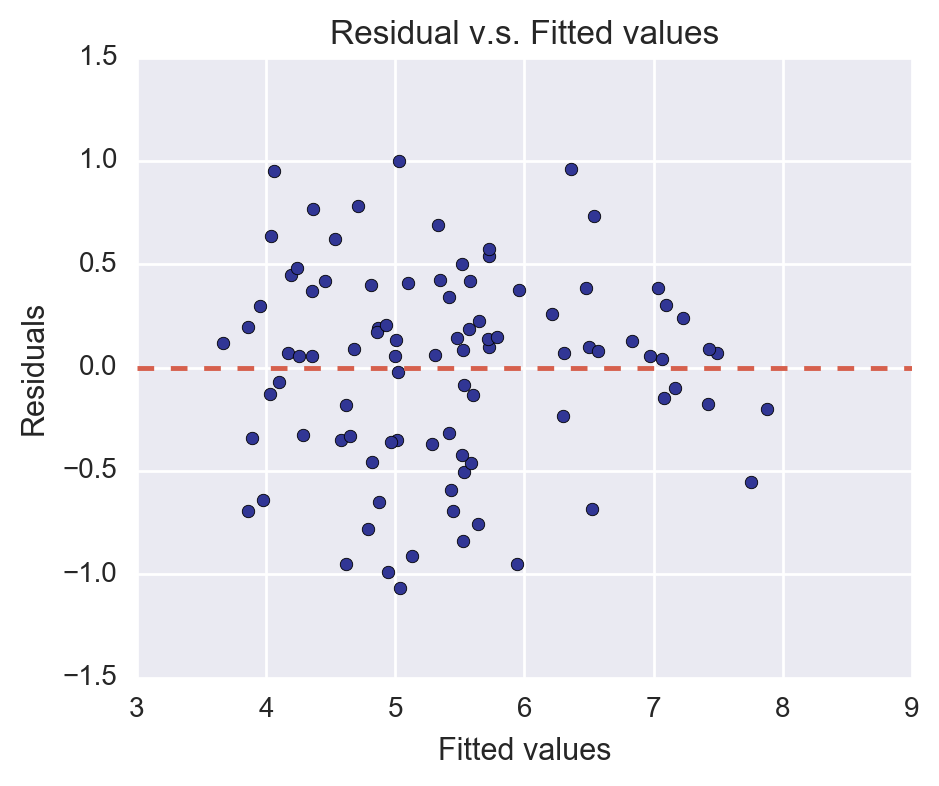

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.scatter(fit1.fittedvalues,fit1.resid,s=20,c='#313695')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual v.s. Fitted values')

ax.axhline(y=0,ls='--',c='#d6604d')

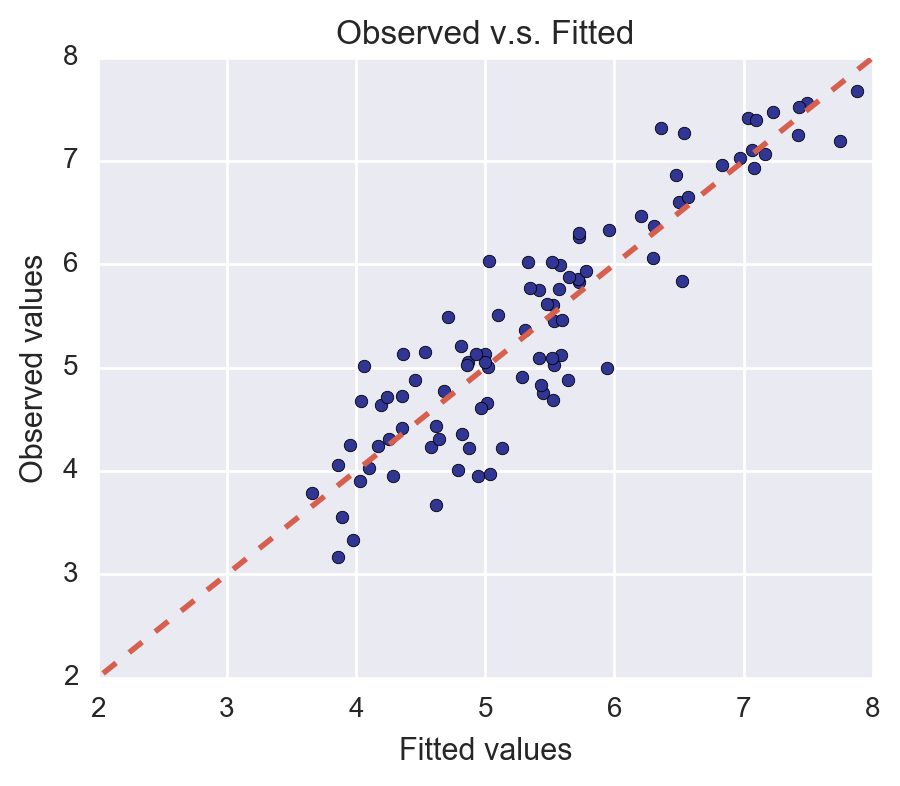

In [17]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.scatter(fit1.fittedvalues,Y_traindf,s=20,c='#313695')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Observed values')
ax.set_title('Observed v.s. Fitted')
ax.set_xlim(2,8)
ax.set_ylim(2,8)

ax.plot([0,8],[0,8],ls='--',lw=2,c='#d6604d')

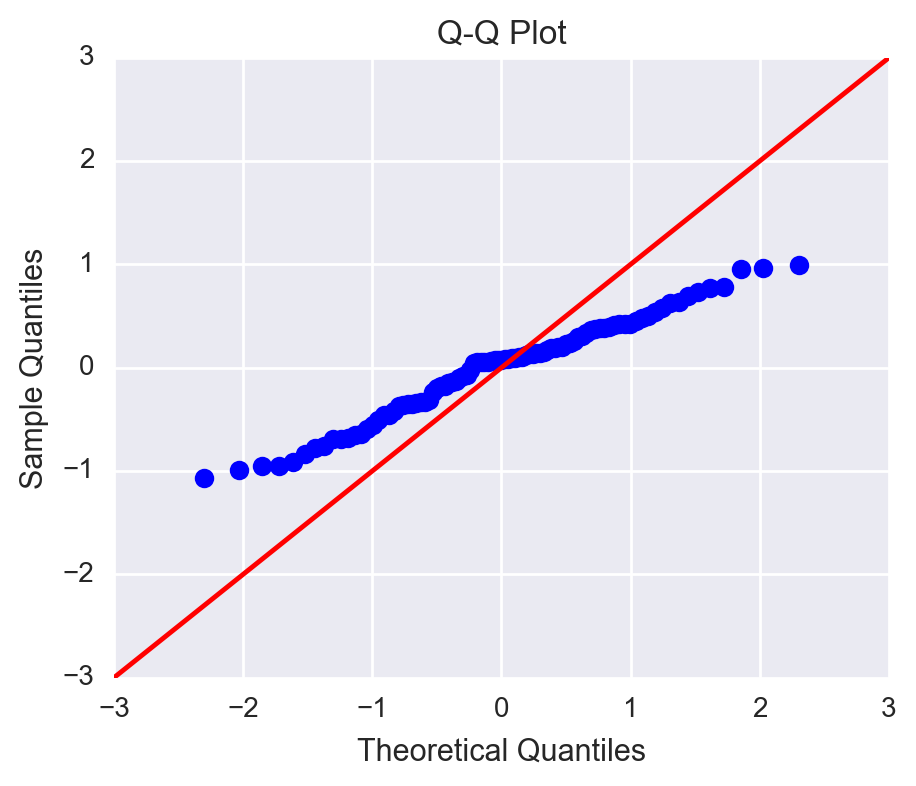

In [18]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
probplot = sm.ProbPlot(fit1.resid)
probplot.qqplot(line='45', ax=ax)

ax.set_title('Q-Q Plot')

(-1.2, 1.2)

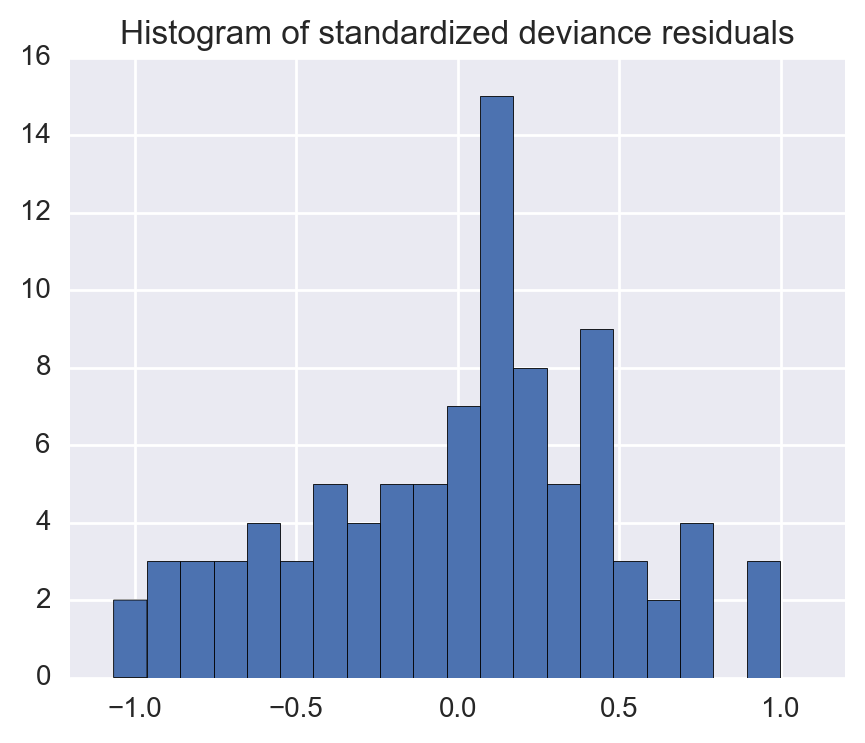

In [19]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ax.hist(fit1.resid, bins=20)
ax.set_title('Histogram of standardized deviance residuals');
ax.set_xlim(-1.2,1.2)

**Conclusion 2.1**

### 2.2 Feature selections

Let's start from a null model and make a Foward Model Selection. This is a greedy algorithm to pick up the most important features and train the reasonable model

In [20]:
## null model:

beta0=Y_traindf.mean()
max_r2=0.0
print beta0

5.40526390589


In [21]:
## This loop is the forward feature selection method:

num_features=len(X_traindf.columns.values)
features=X_traindf.columns.values

features=[i for i in range(num_features)]
flist=[0]

for i in range(num_features):
    ## the second loop is over the 1,2,3,...points, so that it will compare the extra feature:
    max_r2=0.0
    for j in range(num_features-i):
        flist[-1]=features[j]
        
        ## fit the model:
        X_b0=sm.add_constant(X_traindf.ix[:,flist])
        fit_model=sm.OLS(Y_traindf,X_b0).fit()
        r2=fit_model.rsquared_adj
        
        ## pick up the best feature index by using adjust r^2
        if r2>=max_r2:
            max_r2=r2
            max_index=features[j]
    
    flist[-1]=max_index
    if len(flist)<num_features:
        flist.append(0)
    features.remove(max_index)

In [22]:
print "The feature list is:",flist
print "--------------------------"
print "They corrospond to:"
for i in flist:
    print X_traindf.columns.values[i]

The feature list is: [17, 11, 2, 10, 6, 7, 0, 3, 18, 15, 4, 14, 9, 1, 5, 16, 13, 12, 8]
--------------------------
They corrospond to:
log_income
unemploy
social_support
alcohol
publicEdu
homicide
gdp
life_expectancy
log_ave_visitor
log_child
Generosity
visitor
uniEnro
confidence
gini
log_healthExp
suicide
food
ecoFree


In [23]:
from sklearn.model_selection import KFold

## Calculate root mean squared error that used to judge our algorithm
def rmse_metric(actual,predicted):
    sum_error=0.0
    for i in range(len(actual)):
        prediction_error=predicted[i]-actual[i]
        sum_error+=(prediction_error**2)
    mean_error=sum_error/float(len(actual))
    return np.sqrt(mean_error)

def cv_split(X_set,Y_set,n_splits):
    ## Split in n folds:
    kf = KFold(n_splits=10)
    fold = 0
    score=[];rmse=[]
    for train_idx, test_idx in kf.split(X_set):
        fold += 1
        X_train, X_valid = X_set.iloc[train_idx], X_set.iloc[test_idx]
        y_train, y_valid = Y_set.iloc[train_idx], Y_set.iloc[test_idx]
        Xt_b0=sm.add_constant(X_train)
        Xv_b0=sm.add_constant(X_valid)
        fit=sm.OLS(y_train,Xt_b0).fit()
        score.append(fit.rsquared_adj)
        predicted=fit.predict(Xv_b0)
        rmse.append(rmse_metric(y_valid.values,predicted))
    mes="The adjusted r^2 number is %f, the root mean squre is %f."%(np.array(score).mean(),np.array(rmse).mean())
    return mes

In [24]:
## models

# models=[cv_split(X_traindf[flist[0:i+1]],Y_traindf,10) for i in range(len(flist))]
for i in range(len(flist)):
    print "The number of features:"+str(i+1)+',',cv_split(X_traindf[flist[0:i+1]],Y_traindf,10)

The number of features:1, The adjusted r^2 number is 0.616734, the root mean squre is 0.682745.
The number of features:2, The adjusted r^2 number is 0.670935, the root mean squre is 0.649913.
The number of features:3, The adjusted r^2 number is 0.703954, the root mean squre is 0.620584.
The number of features:4, The adjusted r^2 number is 0.724203, the root mean squre is 0.603561.
The number of features:5, The adjusted r^2 number is 0.735320, the root mean squre is 0.611074.
The number of features:6, The adjusted r^2 number is 0.743961, the root mean squre is 0.607192.
The number of features:7, The adjusted r^2 number is 0.754563, the root mean squre is 0.593159.
The number of features:8, The adjusted r^2 number is 0.769327, the root mean squre is 0.582662.
The number of features:9, The adjusted r^2 number is 0.785447, the root mean squre is 0.568579.
The number of features:10, The adjusted r^2 number is 0.789705, the root mean squre is 0.567717.
The number of features:11, The adjusted

From the previous calculation, the best model which has the highest ***adjust $R^2$*** is the one with twelve features, it also gives us the minimum average root mean square error by using cross_validation. In the next section, let's train the model again based on the result in this section


### 2.3 New model with 12 features

In [25]:
Xt_b0=sm.add_constant(X_traindf[flist[0:12]])

fit2=sm.OLS(Y_traindf,Xt_b0).fit()

In [26]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     30.21
Date:                Tue, 04 Apr 2017   Prob (F-statistic):           8.96e-25
Time:                        10:08:22   Log-Likelihood:                -63.735
No. Observations:                  93   AIC:                             153.5
Df Residuals:                      80   BIC:                             186.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -4.6345      2.046     -2.266      0.026        -8.706    -0.563
log_income          1.0261      0.172      5.960      0.000         0.684     1.369
unemploy           -0.0349      0.010     -3.370      0.001        -0.056    -0.014
social_support      2.1549      0.684      3.149      0.002         0.793     3.517
alcohol            -0.0189      0.021     -0.883      0.380        -0.062     0.024
publicEdu           0.0638      0.037      1.724      0.089        -0.010     0.137
homicide            0.0141      0.006      2.440      0.017         0.003     0.026
gdp                -0.6272      0.211     -2.977      0.004        -1.046    -0.208
life_expectancy     0.0734      0.020      3.665      0.000         0.034     0.113
log_ave_visitor    -0.0614      0.032     -1.908      0.060        -0.125     0.003
log_child           0.3434      0.173      1.984      0.051        -0.001     0.688
Generosity          0.5359      0.395      1.357      0.179        -0.250     1.322
visitor         -4.687e-09   4.47e-09     -1.049      0.297     -1.36e-08   4.2e-09
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                1.199
Skew:                          -0.203   Prob(JB):                        0.549
Kurtosis:                       2.620   Cond. No.                     5.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

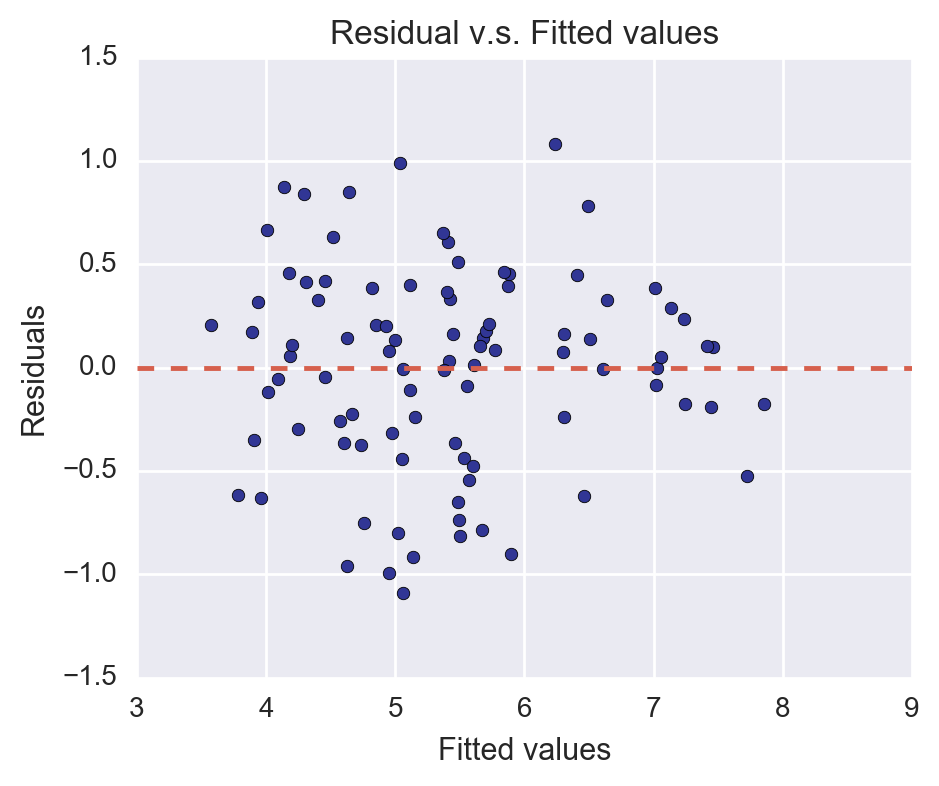

In [27]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.scatter(fit2.fittedvalues,fit2.resid,s=20,c='#313695')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual v.s. Fitted values')

ax.axhline(y=0,ls='--',c='#d6604d')

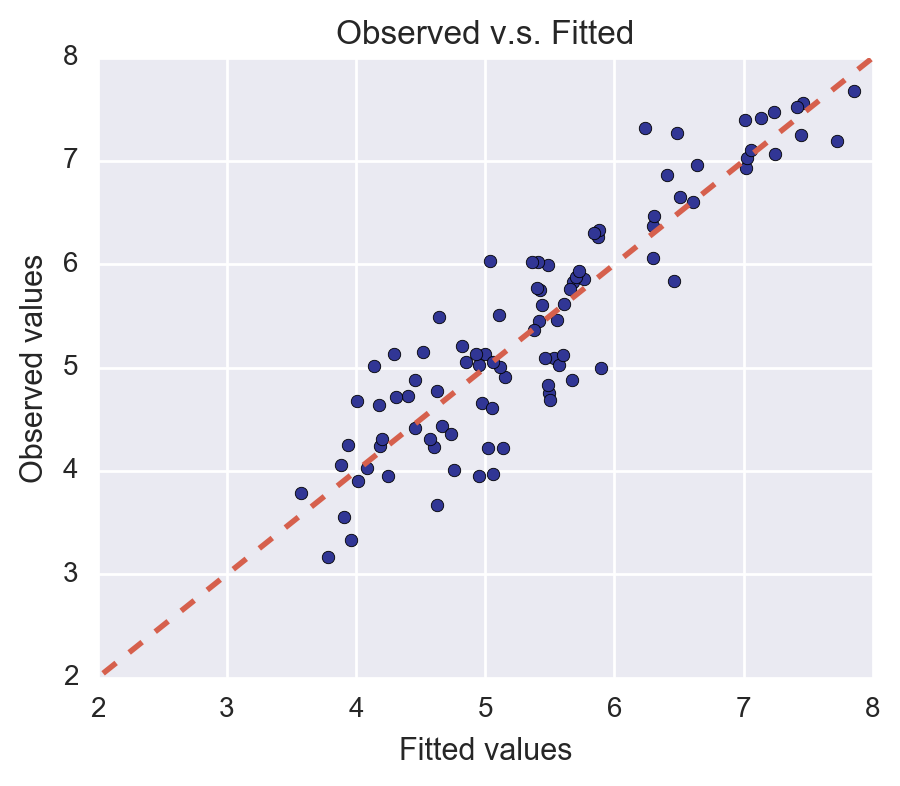

In [28]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.scatter(fit2.fittedvalues,Y_traindf,s=20,c='#313695')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Observed values')
ax.set_title('Observed v.s. Fitted')
ax.set_xlim(2,8)
ax.set_ylim(2,8)

ax.plot([0,8],[0,8],ls='--',lw=2,c='#d6604d')

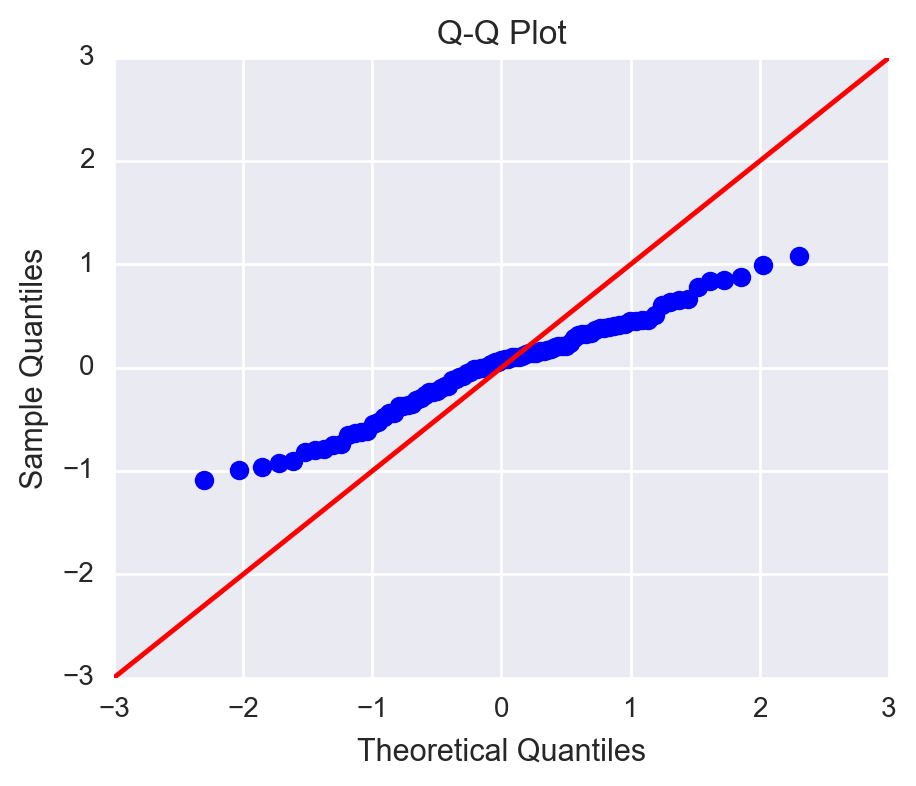

In [29]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
probplot = sm.ProbPlot(fit2.resid)
probplot.qqplot(line='45', ax=ax)

ax.set_title('Q-Q Plot')

The table above shows the result of our new model with only 11 features. However, we noticed that the alcohol has a $p-value$ about 0.3, and coefficient -0.0223, so that let's try to accept the null hypothesis that this feature is not useful and let's train the model again. 

In [30]:
Xt_b0_1=Xt_b0.drop('alcohol',axis=1)

fit2=sm.OLS(Y_traindf,Xt_b0_1).fit()

print 'The r^2 number is: ',fit2.rsquared
print 'The adjust r^2 number is: ',fit2.rsquared_adj

The r^2 number is:  0.817451926553
The adjust r^2 number is:  0.792661447443


In [93]:
Xt_b0_2=Xt_b0.drop(['visitor','alcohol'],axis=1)

fit3=sm.OLS(Y_traindf,Xt_b0_2).fit()

print 'The r^2 number is: ',fit3.rsquared
print 'The adjust r^2 number is: ',fit3.rsquared_adj

The r^2 number is:  0.814216544632
The adjust r^2 number is:  0.791560025685


In [94]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     35.94
Date:                Tue, 04 Apr 2017   Prob (F-statistic):           7.16e-26
Time:                        10:32:53   Log-Likelihood:                -65.003
No. Observations:                  93   AIC:                             152.0
Df Residuals:                      82   BIC:                             179.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -4.9972      1.918     -2.605      0.011        -8.813    -1.181
log_income          0.9781      0.169      5.784      0.000         0.642     1.314
unemploy           -0.0328      0.010     -3.196      0.002        -0.053    -0.012
social_support      2.0625      0.673      3.066      0.003         0.724     3.401
publicEdu           0.0650      0.037      1.756      0.083        -0.009     0.139
homicide            0.0144      0.006      2.498      0.014         0.003     0.026
gdp                -0.5960      0.210     -2.843      0.006        -1.013    -0.179
life_expectancy     0.0777      0.018      4.274      0.000         0.042     0.114
log_ave_visitor    -0.0668      0.032     -2.086      0.040        -0.130    -0.003
log_child           0.3908      0.159      2.458      0.016         0.075     0.707
Generosity          0.6493      0.384      1.689      0.095        -0.116     1.414
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.837
Skew:                          -0.264   Prob(JB):                        0.399
Kurtosis:                       2.558   Cond. No.                     2.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conculsion:**

Indeed, as we see, with or without this feature, there is no big difference between or model fitting. So alcohol is not an importnat feature to determine the happiness score.

## 3. Models comparison between different algorithms

Now after our work in previous sesstion, we have a more reasonable dataset. In this section, we will use different machine learning algorithms provided by sklearn, to find out the best reuslt

In [95]:
## The new training set of input data

Xt_new=X_traindf[flist[0:12]].drop(['alcohol','visitor'],axis=1)
Xt_new.head()

,log_income,unemploy,social_support,publicEdu,homicide,gdp,life_expectancy,log_ave_visitor,log_child,Generosity
26,8.780173,10.6,0.914373,4.400000,31.3,9.379269,63.378395,0.722872,2.856470,-0.016155
8,8.574707,5.2,0.761873,2.100000,2.2,9.673333,61.796833,3.183320,3.575151,-0.164401
86,6.944087,3.3,0.612250,4.430709,2.5,7.680000,56.505810,0.542921,4.012773,-0.009630
106,6.891626,10.3,0.711077,5.500000,7.9,7.688933,56.133411,1.628578,4.023564,-0.019044
97,8.550821,3.6,0.764072,2.900000,9.5,9.291985,64.439781,0.843048,2.949688,-0.089913


In [76]:
print_columns(Xt_new)

There are 9 columns
They are:
log_income
unemploy
social_support
publicEdu
homicide
gdp
life_expectancy
log_ave_visitor
log_child


In [96]:
## The test dataset of input

Xv_new=X_testdf[flist[0:12]].drop(['alcohol','visitor'],axis=1)
Xv_new.head()

,log_income,unemploy,social_support,publicEdu,homicide,gdp,life_expectancy,log_ave_visitor,log_child,Generosity
119,11.243934,4.2,0.946864,5.1,0.6,10.907451,72.734001,5.379312,1.458615,0.125867
135,7.244228,1.8,0.775009,6.3,1.5,8.499502,65.658440,3.099432,3.157000,-0.107827
124,8.288786,14.0,0.614423,6.2,3.1,9.262417,64.258926,3.648009,2.760010,-0.191534
101,11.123713,0.5,0.838132,3.5,7.2,11.797896,67.335197,5.309095,2.151762,0.110089
22,10.776516,7.2,0.948128,5.3,1.6,10.642206,71.330971,0.640445,1.667707,0.274329


In [97]:
# Test options and evaluation metric

num_folds=10  ## k-fold cross validation parameter
seed=7
scoring='neg_mean_squared_error' ## the metric for linear regression accuracy, be careful, this is negative value, so we a expecting  the maximum value
## Algorithm comparison table

compare=dict()

In [98]:
# Spot-Check Algorithms

models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('SVR',SVR()))

In [99]:
# evaluate each model in turn

results=[]
names=[]
compare['Unscaled']=list()
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,Xt_new,Y_traindf,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    compare['Unscaled'].append(cv_results.mean())
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

LR:-0.325041 (0.161347)
LASSO:-0.758607 (0.368744)
EN:-0.744762 (0.436203)
KNN:-0.571228 (0.267221)
SVR:-0.751563 (0.345118)


### 3.1 Evaluate Algorithms: Standardization

In [100]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

In [101]:
results=[]
names=[]
compare['Scaled']=list()
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,Xt_new,Y_traindf,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    compare['Scaled'].append(cv_results.mean())
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledLR:-0.325041 (0.161347)
ScaledLASSO:-1.302421 (0.495503)
ScaledEN:-0.835955 (0.327876)
ScaledKNN:-0.455019 (0.272841)
ScaledSVR:-0.381829 (0.181786)


In [102]:
algo=['LR','LASSO','EN','KNN','SVR']

comparedf2=pd.DataFrame(compare,index=algo)
comparedf2

,Scaled,Unscaled
LR,-0.325041,-0.325041
LASSO,-1.302421,-0.758607
EN,-0.835955,-0.744762
KNN,-0.455019,-0.571228
SVR,-0.381829,-0.751563


**Conclusion:**

The linear regression gives us the same result no matter the data scaled or not. However, the support vector regressor also gives us a promising result. We know that SVC is sensitive to the data. Now let's study this algorithm

In [103]:
pipelines1=[]
pipelines1.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SSVR',SVR())])))
pipelines1.append(('NormalizedSVR',Pipeline([('Normal',Normalizer()),('NSVR',SVR())])))

In [104]:
results=[]
names=[]
for name,model in pipelines1:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,Xt_new,Y_traindf,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledSVR:-0.381829 (0.181786)
NormalizedSVR:-1.337512 (0.418254)


**Tunning parameters of SVR**

In [105]:
scaled=StandardScaler().fit(Xt_new)
rescaledX=scaled.transform(Xt_new)
c_values=[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
model=SVR()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_traindf)

In [106]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -0.350987 using {'kernel': 'linear', 'C': 0.7}
-0.371588 (0.286682) with: {'kernel': 'linear', 'C': 0.1}
-0.549593 (0.284215) with: {'kernel': 'poly', 'C': 0.1}
-0.645434 (0.266818) with: {'kernel': 'rbf', 'C': 0.1}
-0.465212 (0.219215) with: {'kernel': 'sigmoid', 'C': 0.1}
-0.355719 (0.256132) with: {'kernel': 'linear', 'C': 0.3}
-0.536453 (0.345746) with: {'kernel': 'poly', 'C': 0.3}
-0.404248 (0.186870) with: {'kernel': 'rbf', 'C': 0.3}
-0.431002 (0.301090) with: {'kernel': 'sigmoid', 'C': 0.3}
-0.354259 (0.250994) with: {'kernel': 'linear', 'C': 0.5}
-0.579393 (0.409927) with: {'kernel': 'poly', 'C': 0.5}
-0.387884 (0.175079) with: {'kernel': 'rbf', 'C': 0.5}
-0.453042 (0.320352) with: {'kernel': 'sigmoid', 'C': 0.5}
-0.350987 (0.239360) with: {'kernel': 'linear', 'C': 0.7}
-0.626119 (0.459634) with: {'kernel': 'poly', 'C': 0.7}
-0.372652 (0.171386) with: {'kernel': 'rbf', 'C': 0.7}
-0.542555 (0.308261) with: {'kernel': 'sigmoid', 'C': 0.7}
-0.354220 (0.251075) with: {'kernel

## 4. Finalize our model

In this section, we will finalize our model based on the regular linear regression and Scaled SVR

### 4.1 Regular Linear regression

In [107]:
scaler=StandardScaler().fit(Xt_new)
rescaledX=scaler.transform(Xt_new)
model=LinearRegression()
model.fit(rescaledX,Y_traindf)

rescaledValidationX=scaler.transform(Xv_new)
predictions_LR=model.predict(rescaledValidationX)
print mean_squared_error(Y_testdf,predictions_LR)

0.270809730635


### 4.2 Scaled SVR

In [108]:
scaler=StandardScaler().fit(Xt_new)
rescaledX=scaler.transform(Xt_new)
model=SVR(kernel='linear', C=0.7)
model.fit(rescaledX,Y_traindf)

rescaledValidationX=scaler.transform(Xv_new)
predictions_SVR=model.predict(rescaledValidationX)
print mean_squared_error(Y_testdf,predictions_SVR)

0.293888722329


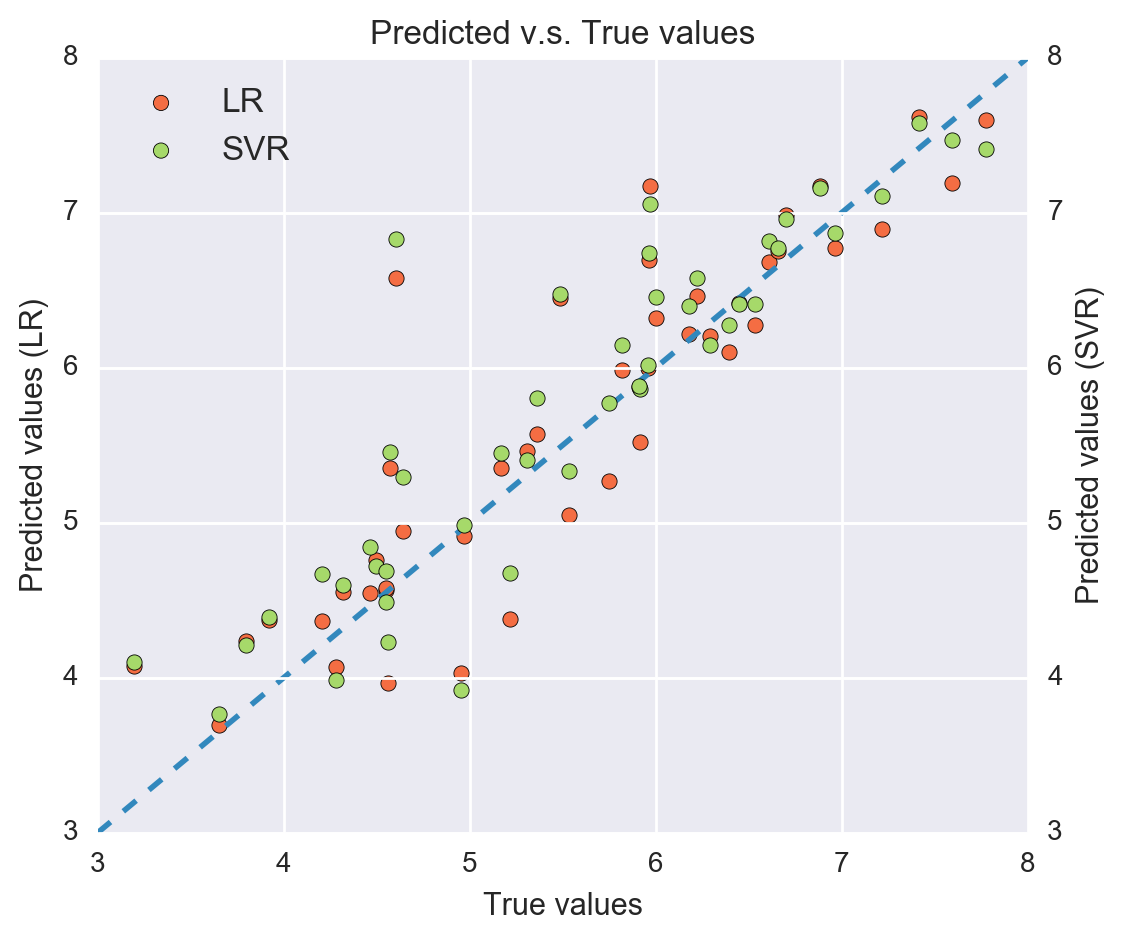

In [109]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

lns1=ax.scatter(Y_testdf,predictions_LR,s=30,c='#f46d43',label='LR')
ax2 = ax.twinx()
lns2=ax2.scatter(Y_testdf,predictions_SVR,s=30,c='#a6d96a',label='SVR')

ax2.set_ylabel('Predicted values (SVR)')
ax2.set_ylim(3,8)
ax.set_xlabel('True values')
ax.set_ylim(3,8)
ax.set_ylabel('Predicted values (LR)')
ax.set_title('Predicted v.s. True values')
ax.set_xlim(3,8)

ax.plot([3,8],[3,8],ls='--',lw=2,c='#3288bd')
p=[lns1,lns2]
legend=ax.legend(p, [p_.get_label() for p_ in p],
           loc= 'upper left', fontsize= 'large')

legend.get_frame().set_edgecolor('r')